<a href="https://colab.research.google.com/github/sangeetha62/Machine-learning/blob/main/topic_26_project_car_price_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# we are going topredict the car price by using regression model.
# The training data is "car economy price.csv" file. other is testin data  "test-data.csv" used for testing.


In [ ]:
# first we are working on training data.
# importing libraries
import numpy as np
import pandas as pd
df=pd.read_csv("/content/car economy price.csv")

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
# finding the missing values
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [ ]:
# in the newprice column more than 90% of datas are missing. so we can drop this column.and also there is an unwanted column "unnamed". so
# dropping this too.
# here there are some columns in string pattern, "name,location,fueltype,transmission,owner type". so need to encode all. after encoding 
# name, we understodd that there are 2000 of different names.
# 2000 of diffrenet names will not give any benefit to model as there is no repetition.so dropping name column.


(array([1614.,  161.,   56.,   30.,    5.,    5.,    5.,    0.,    0.,
           2.]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <a list of 10 Patch objects>)

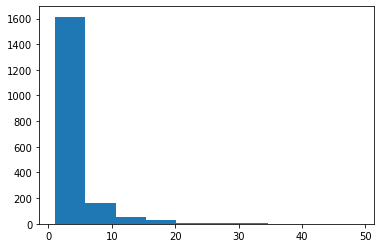

In [ ]:
name=df['Name'].value_counts()
import matplotlib.pyplot as plt
plt.hist(name)

In [ ]:
df['Location'].value_counts()    # always do graphical representation for the counts to make it more attractive


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
y=df['Location'].value_counts()

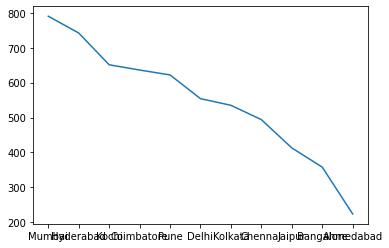

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y)

In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

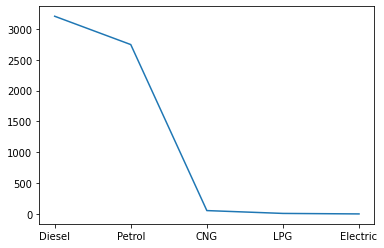

In [ ]:
fuel_type=df['Fuel_Type'].value_counts()
plt.plot(fuel_type)

In [ ]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

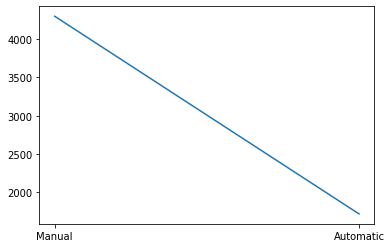

In [ ]:
Transmission=df['Transmission'].value_counts()
plt.plot(Transmission)

In [ ]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

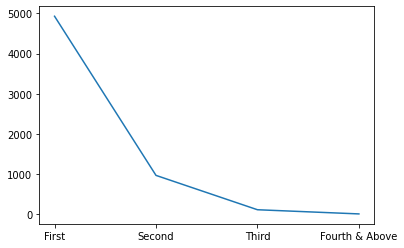

In [ ]:
owner=df['Owner_Type'].value_counts()
plt.plot(owner)

In [ ]:
# encoding to convert string columns to numericals
# here using ###### get_dummy encoding #############  

In [ ]:
dummy=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
dummy  # formed a dataframe

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
# concatination ( to combine new dataframe and old dataframe)
dfnew=pd.concat([df,dummy],axis=1)
dfnew

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,0,0,0,1,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfnew.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# now dropping unnecessary columns.
dfnew=dfnew.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1)

In [ ]:
## now see the mileage column, all values has units along with it.. so going to remove the string from a number using "str.replace".
dfnew['Mileage']=dfnew['Mileage'].str.replace('km/kg','')     # here km/kg is the string value to be removed. ('') is replacing this string 
dfnew['Mileage']=dfnew['Mileage'].str.replace('kmpl','')
dfnew['Power']=dfnew['Power'].str.replace('bhp','')
dfnew['Engine']=dfnew['Engine'].str.replace('CC','')
dfnew

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# some where in mileage column some values are "null" so this is to be replaced with 0.
dfnew['Mileage']=dfnew['Mileage'].str.replace('null','0')
dfnew['Engine']=dfnew['Engine'].str.replace('null','0')
dfnew['Power']=dfnew['Power'].str.replace('null','0')
dfnew

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# check the data types of columns.. we need all columns in int or float datatype in ML.
dfnew.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
# converting object to float
dfnew['Mileage']=dfnew['Mileage'].astype(float) 
dfnew['Engine']=dfnew['Engine'].astype(float)
dfnew['Power']=dfnew['Power'].astype(float)
dfnew.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [ ]:
# we have replaced null values with zero, but milaege cant be zero for a car, so it is converting to Nan(not a number) so that it will read
# as missing value we can fill it further. for repacing a number or float with a NaN 
dfnew.loc[dfnew.Engine==0,'Engine']=np.NaN
dfnew.loc[dfnew.Mileage==0,'Mileage']=np.NaN
dfnew.loc[dfnew.Power==0,'Power']=np.NaN
dfnew

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# NaN acted as missing values so the number of missing values increased.
dfnew.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [ ]:
# fillinh=g the missing values
dfnew['Engine']=dfnew['Engine'].fillna(dfnew['Engine'].mean())
dfnew['Mileage']=dfnew['Mileage'].fillna(dfnew['Mileage'].mean())
dfnew['Power']=dfnew['Power'].fillna(dfnew['Power'].mean())
dfnew['Seats']=dfnew['Seats'].fillna(dfnew['Seats'].median())
dfnew

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfnew.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
# separating x and y
x=dfnew.drop(['Price'],axis=1)
x
y=dfnew[['Price']]
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [ ]:
# we have testing data set. so we can take this entire data set for training.. so do all preprocessing steps for testing datas too#

In [ ]:
testdf=pd.read_csv("/content/test-data.csv")

In [ ]:
testdf.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
testdf.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
# calculate count of each strings
testdf['Location'].value_counts()

Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64

(array([106., 136., 159., 134., 143.,  86.,  97., 121.,  82., 170.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

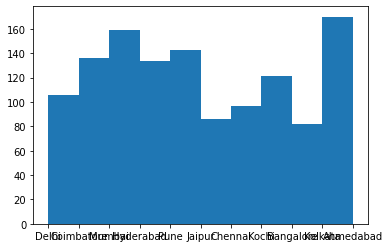

In [ ]:
testdf['Name'].value_counts()
plt.hist(testdf['Location'])

In [ ]:
testdf['Fuel_Type'].value_counts()

Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel_Type, dtype: int64

(array([  6.,   0.,   0., 579.,   0.,   0., 647.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

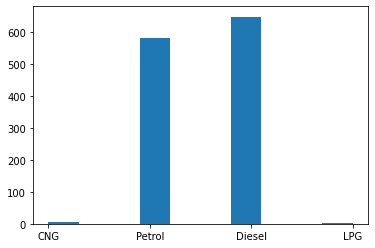

In [ ]:
plt.hist(testdf['Fuel_Type'])

In [ ]:
testdf['Transmission'].value_counts()

Manual       905
Automatic    329
Name: Transmission, dtype: int64

(array([905.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 329.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

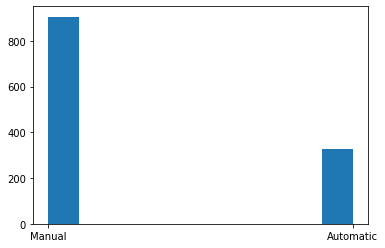

In [ ]:
plt.hist(testdf['Transmission'])

In [ ]:
testdf['Owner_Type'].value_counts()

First             1023
Second             184
Third               24
Fourth & Above       3
Name: Owner_Type, dtype: int64

(array([1023.,    0.,    0.,  184.,    0.,    0.,   24.,    0.,    0.,
           3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

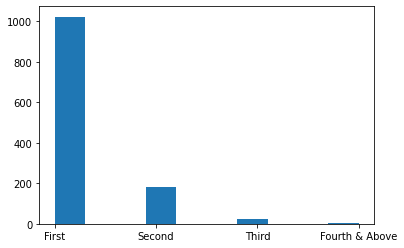

In [ ]:
plt.hist(testdf['Owner_Type'])

In [ ]:
# get_dummy
dummy1=pd.get_dummies(testdf[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)


In [ ]:
# concatination
testdata=pd.concat([dummy,testdf],axis=1)
testdata

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,0,0,0,0,0,0,0,1,0,...,2014.0,40929.0,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,0,0,0,0,0,0,0,0,0,1,...,2013.0,54493.0,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,0,1,0,0,0,0,0,0,0,0,...,2017.0,34000.0,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,0,1,0,0,0,0,0,0,0,0,...,2012.0,139000.0,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,0,0,1,0,0,0,0,0,0,0,...,2014.0,29000.0,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6015,0,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6016,0,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6017,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop unnecessary columns
test_data=testdata.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1)

In [ ]:
# replace strings
test_data['Mileage']=test_data['Mileage'].str.replace('km/kg','')   
test_data['Mileage']=test_data['Mileage'].str.replace('kmpl','')
test_data['Engine']=test_data['Engine'].str.replace('CC','')
test_data['Power']=test_data['Power'].str.replace('bhp','')   
test_data

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2014.0,40929.0,32.26,998,58.2,4.0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,2013.0,54493.0,24.7,796,47.3,5.0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2017.0,34000.0,13.68,2393,147.8,7.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2012.0,139000.0,23.59,1364,null,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2014.0,29000.0,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6015,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6016,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
6017,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace null to zero
test_data['Mileage']=test_data['Mileage'].str.replace('null','0')
test_data['Engine']=test_data['Engine'].str.replace('null','0')
test_data['Power']=test_data['Power'].str.replace('null','0')
test_data

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2014.0,40929.0,32.26,998,58.2,4.0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,2013.0,54493.0,24.7,796,47.3,5.0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2017.0,34000.0,13.68,2393,147.8,7.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2012.0,139000.0,23.59,1364,0,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2014.0,29000.0,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6015,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6016,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
6017,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check for datatypes
test_data.dtypes

Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
Year                         float64
Kilometers_Driven            float64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
dtype: object

In [ ]:
# convert object to float
test_data['Mileage']=test_data['Mileage'].astype(float)
test_data['Engine']=test_data['Engine'].astype(float)
test_data['Power']=dfnew['Power'].astype(float)
test_data

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2014.0,40929.0,32.26,998.0,58.16,4.0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,2013.0,54493.0,24.70,796.0,126.20,5.0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2017.0,34000.0,13.68,2393.0,88.70,7.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2012.0,139000.0,23.59,1364.0,88.76,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2014.0,29000.0,18.50,1197.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,74.00,NaN
6015,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,71.00,NaN
6016,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,NaN,NaN,NaN,NaN,112.00,NaN
6017,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,67.10,NaN


In [ ]:
# convert 0 to NaN
test_data.loc[test_data.Engine==0,'Engine']=np.NaN
test_data.loc[test_data.Mileage==0,'Mileage']=np.NaN
test_data.loc[test_data.Power==0,'Power']=np.NaN
test_data

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2014.0,40929.0,32.26,998.0,58.16,4.0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,2013.0,54493.0,24.70,796.0,126.20,5.0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2017.0,34000.0,13.68,2393.0,88.70,7.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2012.0,139000.0,23.59,1364.0,88.76,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2014.0,29000.0,18.50,1197.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,74.00,NaN
6015,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,71.00,NaN
6016,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,NaN,NaN,NaN,NaN,112.00,NaN
6017,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,NaN,NaN,NaN,NaN,67.10,NaN


In [ ]:
test_data.dtypes

Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
Year                         float64
Kilometers_Driven            float64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
dtype: object

In [ ]:
# filling the missing values
test_data['Engine']=test_data['Engine'].fillna(test_data['Engine'].median())
test_data['Mileage']=test_data['Mileage'].fillna(test_data['Mileage'].median())
test_data['Power']=test_data['Power'].fillna(test_data['Power'].median())
test_data['Seats']=test_data['Seats'].fillna(test_data['Seats'].median())
test_data

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,2014.0,40929.0,32.260000,998.000000,58.16,4.0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,2013.0,54493.0,24.700000,796.000000,126.20,5.0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2017.0,34000.0,13.680000,2393.000000,88.70,7.0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,2012.0,139000.0,23.590000,1364.000000,88.76,5.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,2014.0,29000.0,18.500000,1197.000000,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,NaN,NaN,18.367355,1593.584967,74.00,5.0
6015,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,NaN,NaN,18.367355,1593.584967,71.00,5.0
6016,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,NaN,NaN,18.367355,1593.584967,112.00,5.0
6017,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,NaN,NaN,18.367355,1593.584967,67.10,5.0


In [ ]:
# x_test
z=test_data
z= np.nan_to_num(z)

In [ ]:
# Model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [ ]:
y_pred=model.predict(z)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.22847225e+05],
       [-1.64225343e+05],
       [-9.99549658e+04],
       ...,
       [ 3.35503707e+01],
       [ 5.57212999e+01],
       [ 6.24210675e+01]])